In [4]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("airlines.csv")

In [6]:
data.shape

(4408, 23)

In [7]:
data.dtypes

# of Delays.Carrier                          int64
# of Delays.Late Aircraft                    int64
# of Delays.National Aviation System         int64
# of Delays.Security                         int64
# of Delays.Weather                          int64
Cancelled                                    int64
Carriers.Total                               int64
Code                                        object
Delayed                                      int64
Diverted                                     int64
Flights.Total                                int64
Label                                       object
Minutes Delayed.Carrier                      int64
Minutes Delayed.Late Aircraft                int64
Minutes Delayed.National Aviation System     int64
Minutes Delayed.Security                     int64
Minutes Delayed.Total                        int64
Minutes Delayed.Weather                      int64
Month                                        int64
Month Name                     

### 1. Boxplots of  Percentage of Total Flights Delayed by Each Month (Month with Minimum & Maximum delays highlighted)

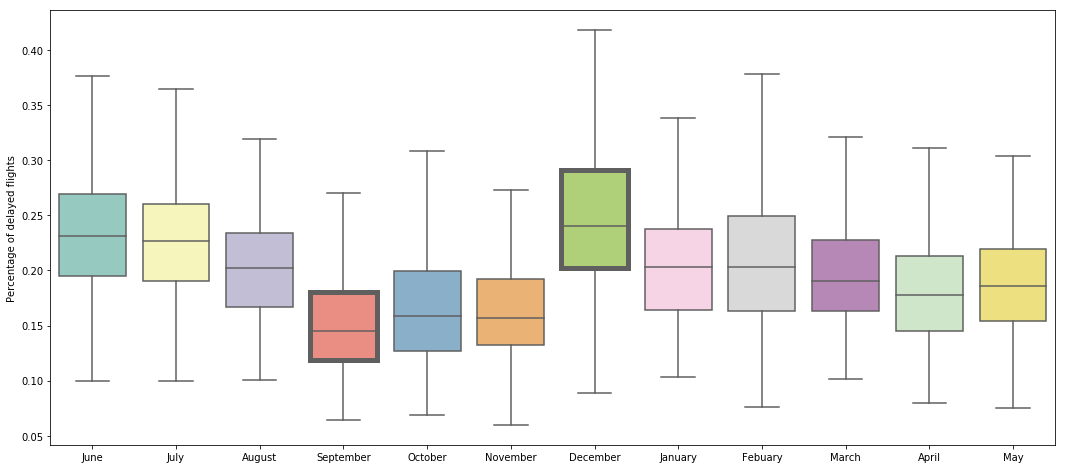

In [9]:
fig, ax = plt.subplots(figsize=(18,8)) 
sns.boxplot(data['Month Name'],data.Delayed/data["Flights.Total"], ax=ax, showfliers=False, palette="Set3") 
ax.set(ylabel="Percentage of delayed flights", xlabel="") 
min_month, max_month = ax.artists[3], ax.artists[6] 
min_month.set_linewidth(5), 
max_month.set_linewidth(5) 
plt.show()

### 2. SwarmPlot of Relationship between Minutes Delayed by Carrier vs Total Number of Carriers

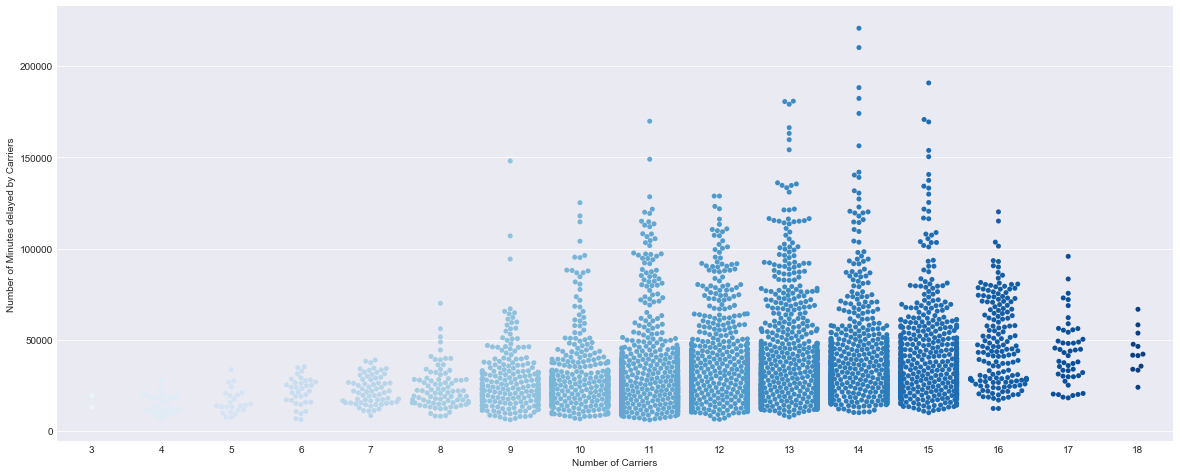

In [12]:
fig, ax = plt.subplots(figsize=(20,8)) 
sns.swarmplot(data["Carriers.Total"], data["Minutes Delayed.Carrier"],ax=ax, palette="Blues") 
ax.set(ylabel="Number of Minutes delayed by Carriers", xlabel="Number of Carriers") 
plt.show()

### 3. BarPlots of Yearly Mean Percentage of Delays (out of Total Flights) due to Carrier, National Aviation System & Weather

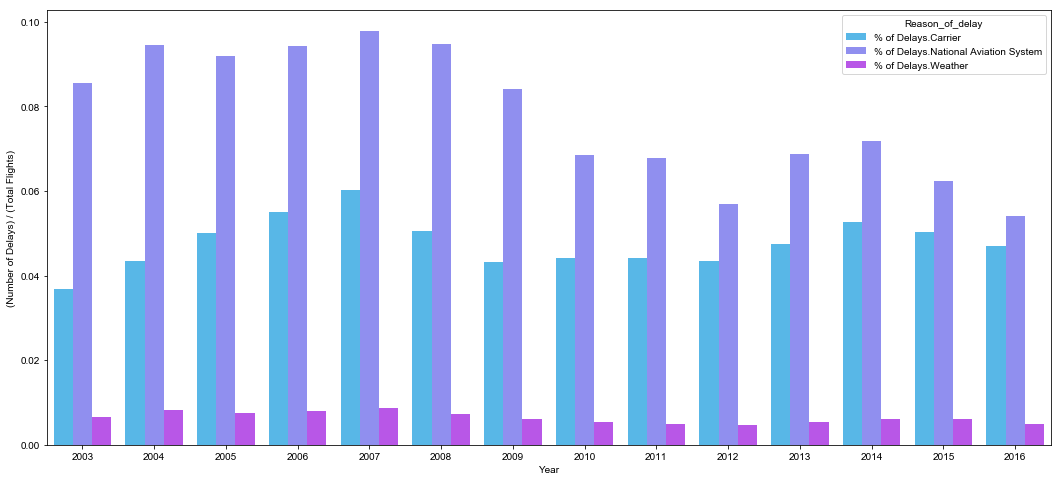

In [11]:
group_data = data[["Year","# of Delays.Carrier","# of Delays.National Aviation System", "# of Delays.Weather","Flights.Total"]].groupby("Year").sum().reset_index() 
for c in ["# of Delays.Carrier","# of Delays.National Aviation System", "# of Delays.Weather"]: 
    group_data[c] = group_data[c]/group_data["Flights.Total"] 
    group_data[c.replace("#", "%")] = group_data[c] 
    del group_data[c] 

melted = pd.melt(group_data.drop(["Flights.Total"], axis = 1), 
                     id_vars="Year", var_name="Reason_of_delay", value_name="Number of Delays")

fig, ax = plt.subplots(figsize=(18,8)) 
sns.barplot(melted["Year"], melted["Number of Delays"],ax=ax, hue=melted["Reason_of_delay"], palette="cool") 
sns.set_style("darkgrid") 
ax.set(ylabel="(Number of Delays) / (Total Flights)", xlabel="Year") 
plt.show()

### 4. Histogram of Total Minutes Delayed for Top 9 Airports (Ranked by Total Flights)

In [15]:
top_airport = data.groupby("Code").sum().sort_values(by = "Minutes Delayed.Total",\
                                                     ascending = False).reset_index()["Code"] 
top_airport[:9]

0    ORD
1    ATL
2    DFW
3    EWR
4    SFO
5    DEN
6    LAX
7    IAH
8    LGA
Name: Code, dtype: object

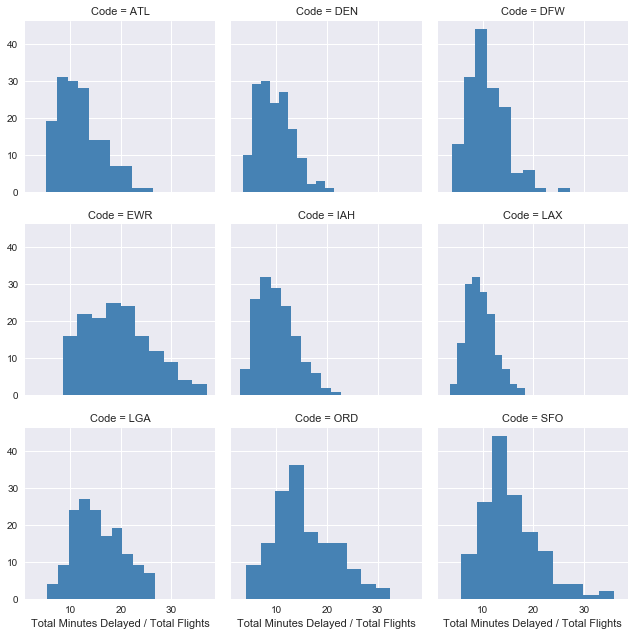

In [16]:
data_filtered = data[(data["Code"].isin(["ATL","ORD","DFW","EWR","SFO", "DEN","LAX","IAH","LGA"]))] 
data_filtered["Total Minutes Delayed / Total Flights"] = data_filtered["Minutes Delayed.Total"]/data_filtered["Flights.Total"] 
sns.set(style="darkgrid") 
g = sns.FacetGrid(data_filtered, col="Code", col_wrap=3,) 
g.map(plt.hist, "Total Minutes Delayed / Total Flights", color="steelblue")
plt.show()


### 5. Scatter Plot of Number of Delays due to Carrier vs Number of Delays due to Weather

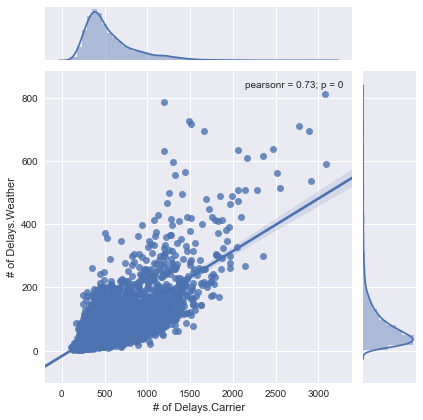

In [18]:
sns.jointplot(x="# of Delays.Carrier", y="# of Delays.Weather", data=data, kind="reg") 
plt.show()

### 6. Scatter Plot of Total Number of Delays vs Total Number of Flights colored by Year

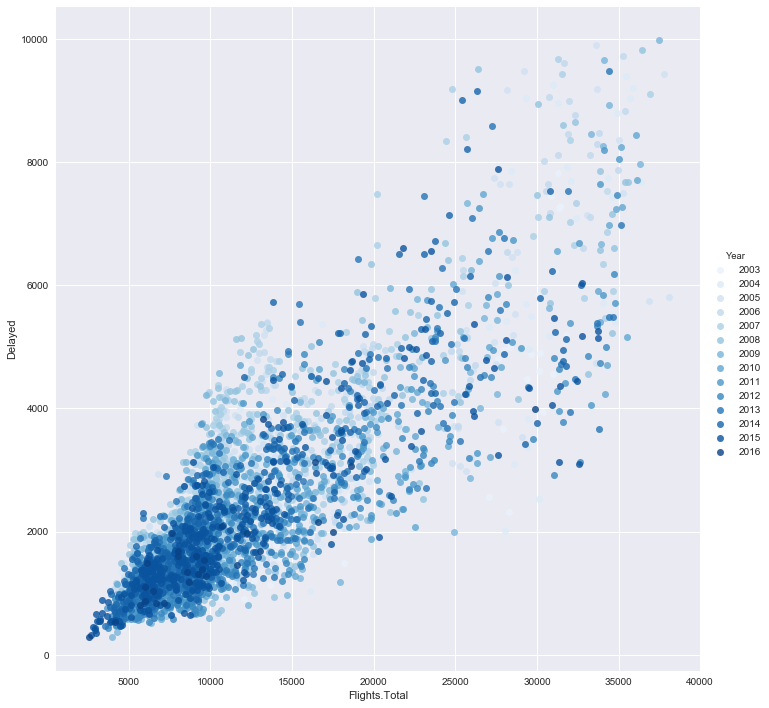

In [19]:
fig=plt.figure(figsize=(16, 8)) 
sns.lmplot(x="Flights.Total", y="Delayed", data=data[data.Delayed<10000], hue="Year", fit_reg=False, size=10, palette="Blues" ) 
plt.show()

### 7. Violin Total Number of Carriers flying Early

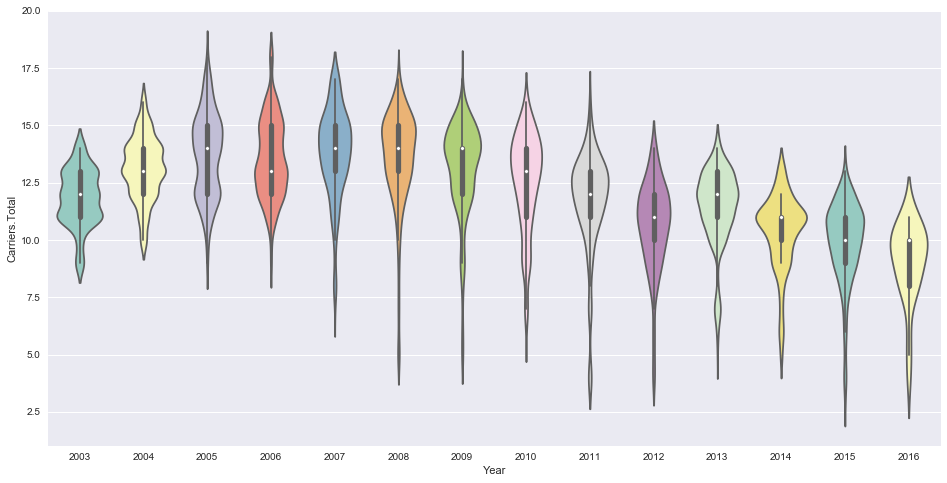

In [20]:
fig=plt.figure(figsize=(16, 8)) 
sns.violinplot(x="Year", y="Carriers.Total", data=data , palette="Set3" ) 
plt.show()